In [1]:
import numpy as np 
import pandas as pd


In [3]:
data=pd.read_csv("/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv")
print(data.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [4]:
from sklearn.model_selection import train_test_split

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
print(data.head())

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [9]:
X=data[['Open','High','Low','Volume']]
y=data[['Close']]

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_scaled=Scaler.fit_transform(X)

In [17]:
#using lasso/ridge to prevent overfitting and improve generalization

from sklearn.linear_model import Ridge, Lasso

In [25]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+04, tolerance: 2.692e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [27]:
model.fit(X_train, Y_train.values.ravel())


LinearRegression()

In [28]:
y_pred = model.predict(X_test)




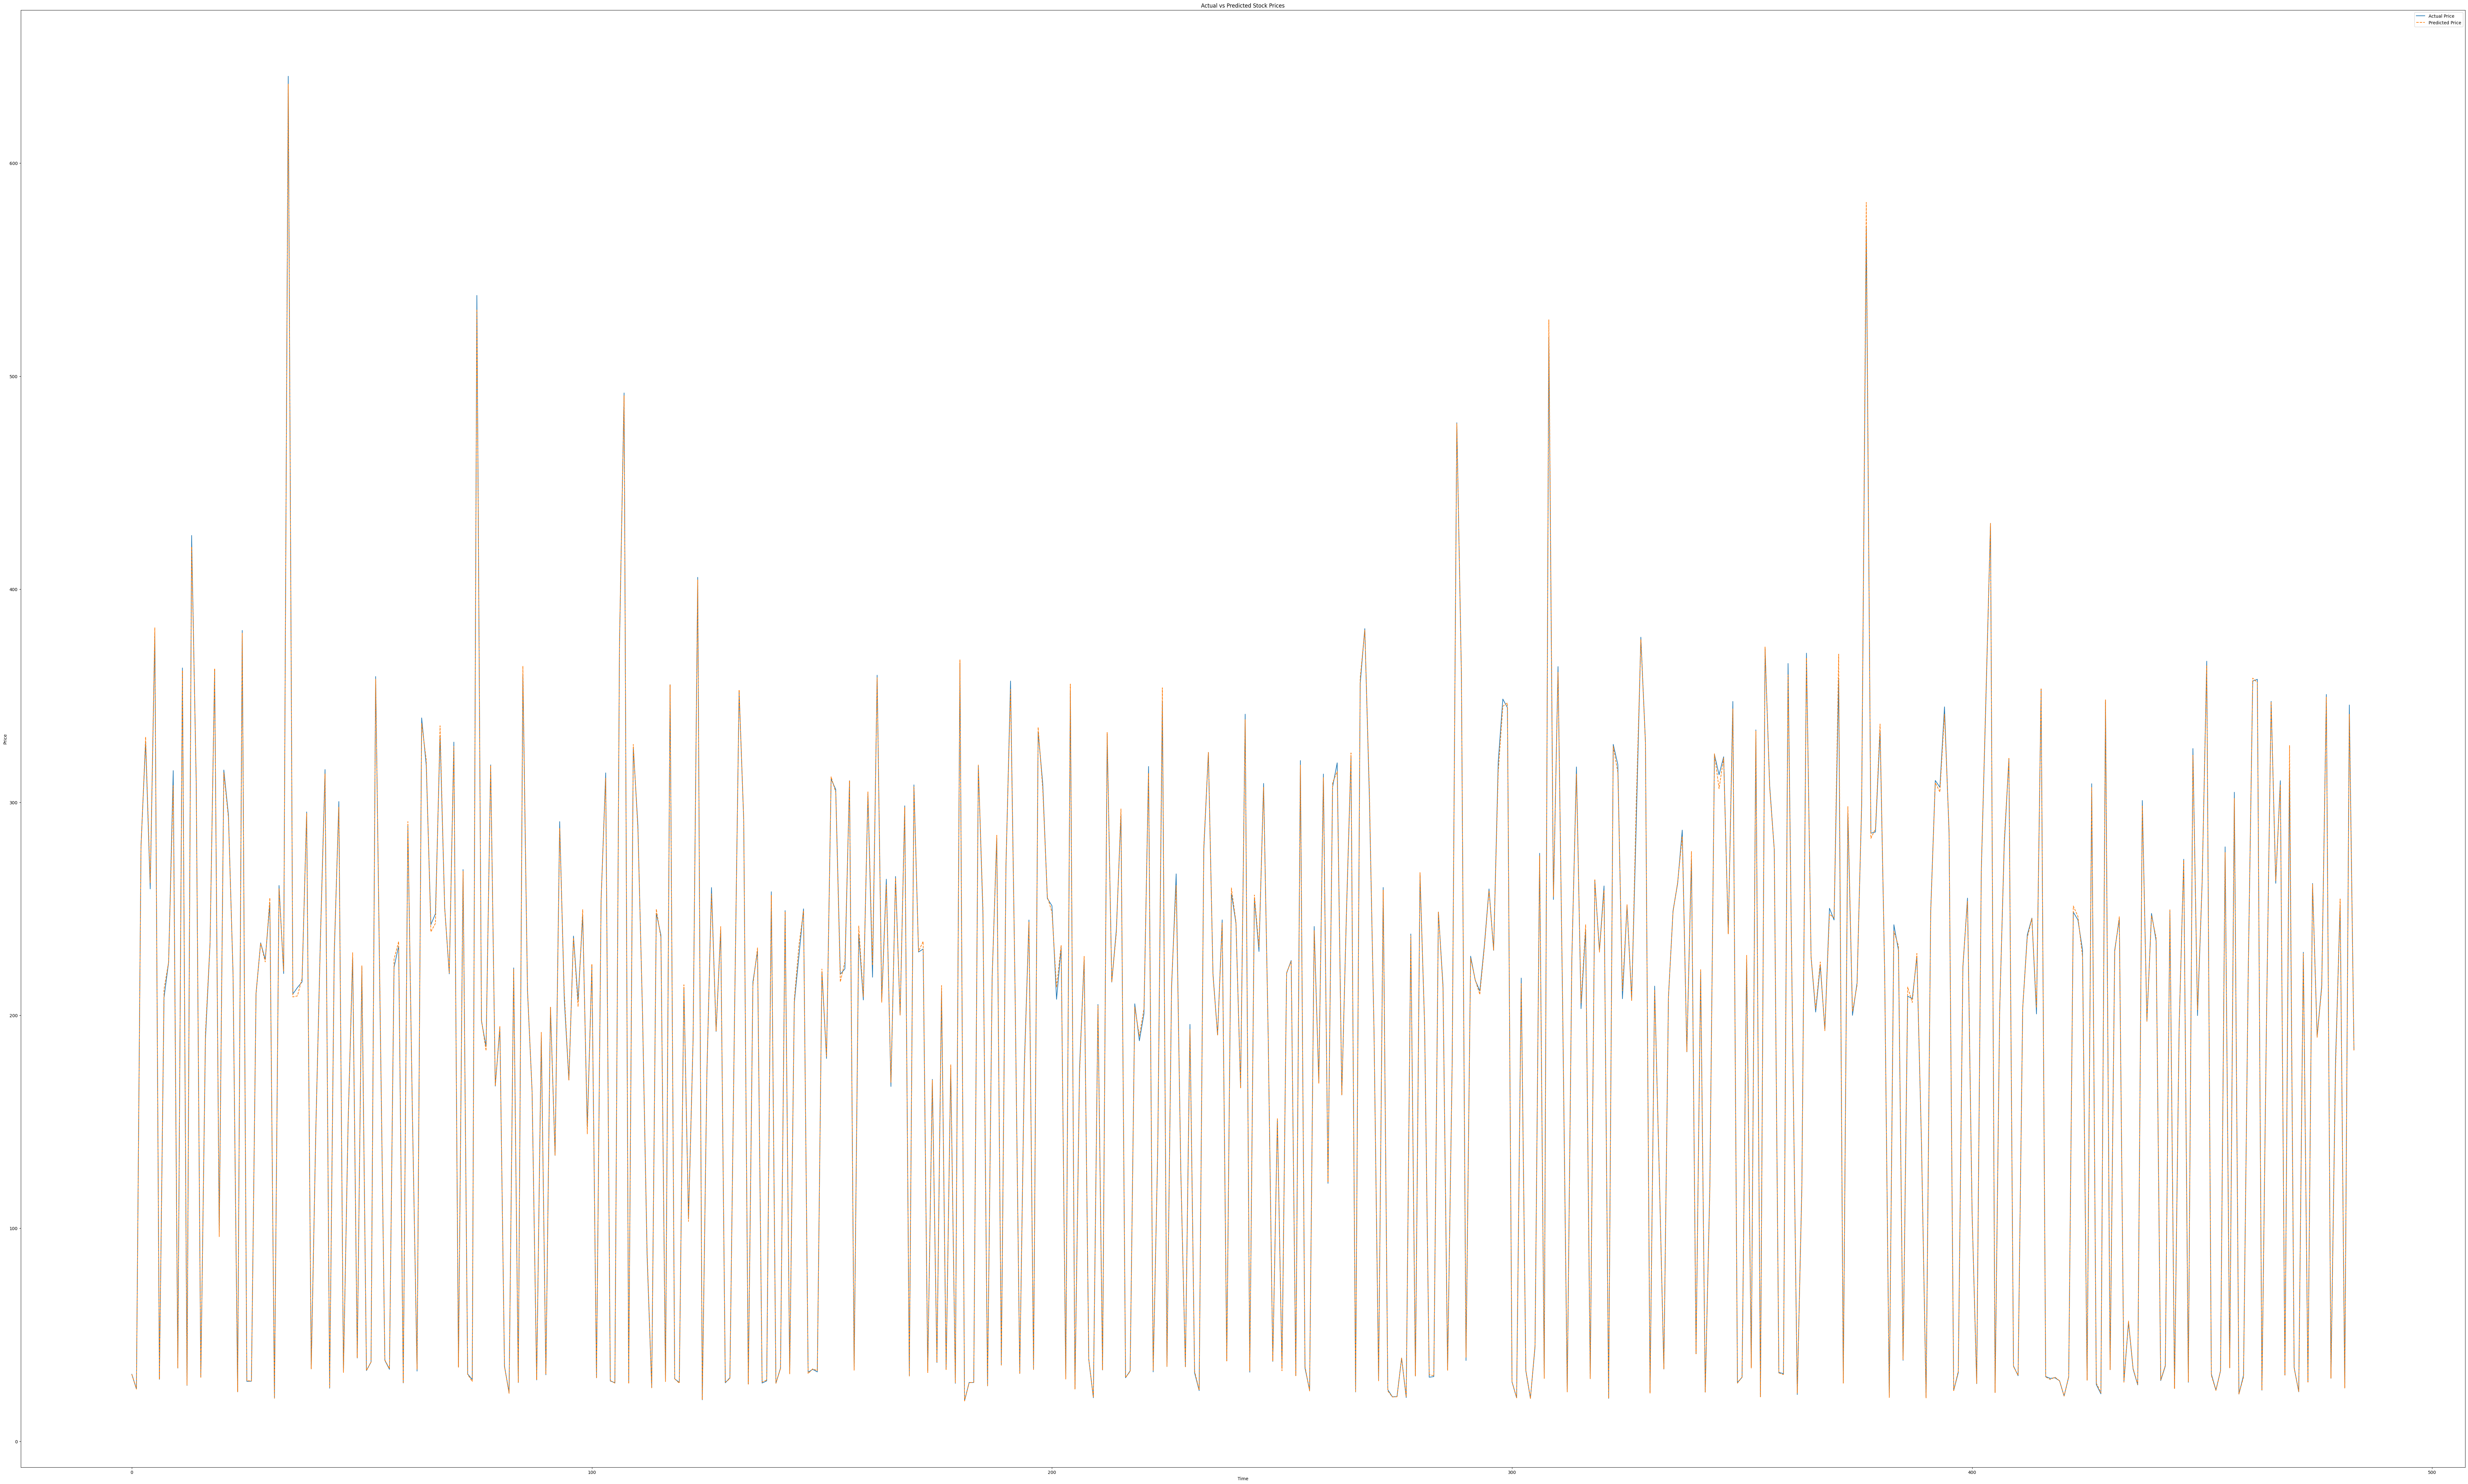

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 60))
plt.plot(Y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(Y_test, y_pred, squared=False)
r2 = r2_score(Y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 2.09
R² Score: 1.00


In [35]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']